In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading data

In [7]:
df_watch=pd.read_csv(r"D:\Sarvesh\Business Analytics\Spring Semester\EAS\Mini Project 1\Watches.csv\Watches.csv")

C:\Users\SHREE\AppData\Local\Temp\ipykernel_7048\1617176094.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_watch=pd.read_csv(r"D:\Sarvesh\Business Analytics\Spring Semester\EAS\Mini Project 1\Watches.csv\Watches.csv")


Data Exploration

In [9]:
df_watch.shape

(284491, 14)

In [11]:
df_watch.head()

,Unnamed: 0,name,price,brand,model,ref,mvmt,casem,bracem,yop,cond,sex,size,condition
0,0,Audemars Piguet Royal Oak Offshore Chronograph...,"$43,500",Audemars Piguet,Royal Oak Offshore Chronograph,26237ST.OO.1000ST.01,NaN,NaN,NaN,2019,Unworn,Men's watch/Unisex,42 mm,NaN
1,1,Audemars Piguet Royal Oak Selfwinding\n39mm Bl...,"$71,500",Audemars Piguet,Royal Oak Selfwinding,15300ST.OO.1220ST.02,NaN,NaN,NaN,2012,Very good,Men's watch/Unisex,39 mm,NaN
2,2,Audemars Piguet Royal Oak Chronograph\nBlue Di...,"$79,191",Audemars Piguet,Royal Oak Chronograph,26331ST,Automatic,Steel,Steel,Unknown,Unworn,NaN,41 mm,NaN
3,3,Audemars Piguet Royal Oak Chronograph\nSelfwin...,"$108,000",Audemars Piguet,Royal Oak Chronograph,26715ST.OO.1356ST.01,Automatic,Steel,Steel,2022 (Approximation),New,Men's watch/Unisex,38 mm,NaN
4,4,Audemars Piguet Royal Oak Offshore Chronograph...,"$27,500",Audemars Piguet,Royal Oak Offshore Chronograph,26170ST.OO.1000ST.01,Automatic,Steel,Steel,Unknown,Very good,Men's watch/Unisex,42 x 54 mm,NaN


In [31]:
df_watch.columns

Index(['Unnamed: 0', 'name', 'price', 'brand', 'model', 'ref', 'mvmt', 'casem',
       'bracem', 'yop', 'cond', 'sex', 'size', 'condition'],
      dtype='object')

In [15]:
df_watch.dtypes

Unnamed: 0     int64
name          object
price         object
brand         object
model         object
ref           object
mvmt          object
casem         object
bracem        object
yop           object
cond          object
sex           object
size          object
condition     object
dtype: object

In [19]:
df_watch.isnull().sum()

Unnamed: 0         0
name           72585
price            406
brand            131
model          30466
ref            43152
mvmt          196685
casem         164271
bracem        174896
yop              134
cond           75987
sex            95805
size           23597
condition     212922
dtype: int64

In [27]:
df_watch['mvmt'].value_counts()

mvmt
Automatic         65600
Quartz            14615
Manual winding     7591
Name: count, dtype: int64

In [29]:
df_watch['price'].value_counts()

price
Price on request    14259
$6,500                255
$12,500               251
$4,500                240
$4,026                239
                    ...  
$74,127                 1
$24,801                 1
$82,735                 1
$50,798                 1
$23,256                 1
Name: count, Length: 36830, dtype: int64

Found out columns like mvmt, price, yop which reuired data cleaning and started cleaning data

In [39]:
# Dropping the 'Unnamed: 0'
df_watch=df_watch.drop(columns='Unnamed: 0')

In [57]:
df_watch=df_watch.dropna(subset=['mvmt']) #keeping the data with known movement type. 

In [37]:
#converting price column to integer.
df_watch=df_watch.dropna(subset=['price']) #dropping data with na in price column 
df_watch=df_watch[df_watch['price']!='Price on request'] #Removing rows with 'Price on request' as value
df_watch['price']=df_watch['price'].str.replace('$','') #Removing $ sign from price column.
df_watch['price']=df_watch['price'].str.replace(',','') #Removing , sign from price column.
df_watch['price']=pd.to_numeric(df_watch['price'])

In [45]:
df_watch['price'].dtype

dtype('int64')

In [47]:
df_watch['yop'].value_counts()

yop
Unknown                 90980
2023                    45712
2022                    19446
2021                    10076
2020                     5380
                        ...  
1893 (Approximation)        1
1891 (Approximation)        1
1846 (Approximation)        1
1845 (Approximation)        1
1650 (Approximation)        1
Name: count, Length: 301, dtype: int64

In [49]:
df_watch['yop']=df_watch['yop'].str.replace('(Approximation)','').str.strip() #Removing string text from yop column

In [51]:
df_watch['yop'].value_counts() 

yop
Unknown    90980
2023       50887
2022       23085
2021       11792
2020        6687
           ...  
1741           1
1878           1
1690           1
1885           1
1650           1
Name: count, Length: 170, dtype: int64

Started Visulizations

Text(0, 0.5, 'Price ($)')

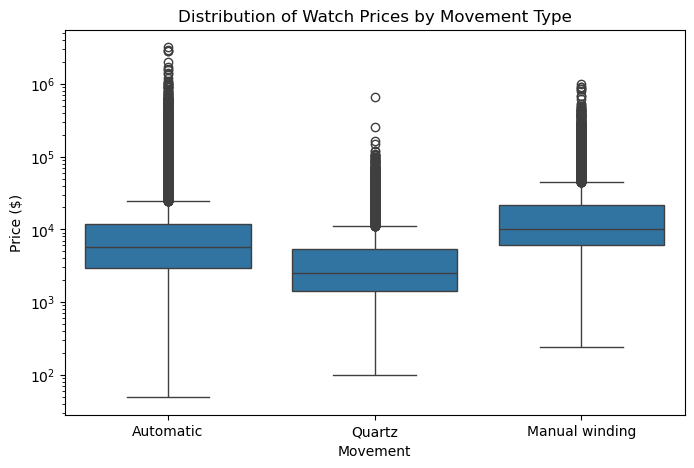

In [77]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='mvmt', y='price', data=df_watch)
plt.yscale("log") #Used log scale instead of actual price scale. Makes graph readability better.
plt.title('Distribution of Watch Prices by Movement Type')
plt.xlabel('Movement')
plt.ylabel('Price ($)')

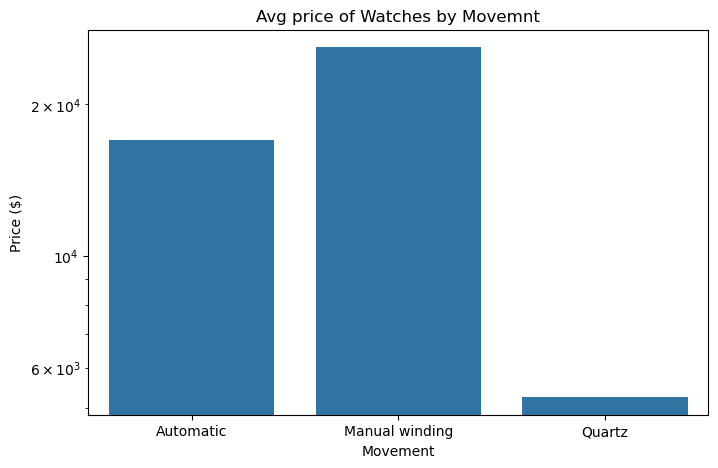

In [93]:
avg_price=df_watch.groupby("mvmt")["price"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price.index, y= avg_price.values)
plt.yscale("log") #Used log scale instead of actual price scale. Makes graph readability better.
plt.title('Avg price of Watches by Movemnt')
plt.xlabel('Movement')
plt.ylabel('Price ($)')
plt.show()

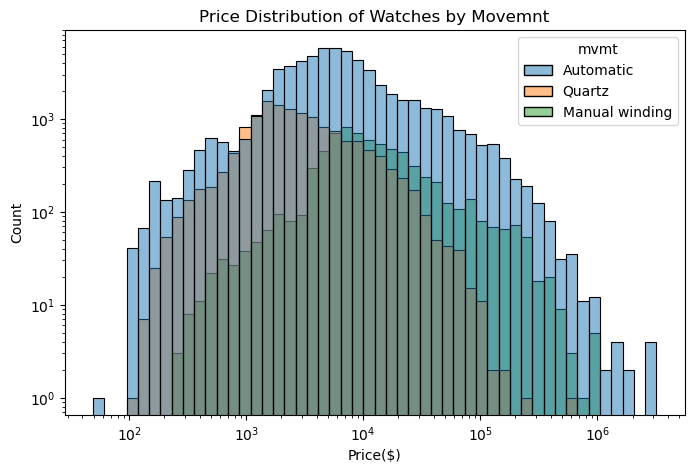

In [103]:
plt.figure(figsize=(8, 5))
sns.histplot(x='price',hue='mvmt', data=df_watch,bins=50,log_scale=True)
plt.yscale("log") #Used log scale instead of actual price scale. Makes graph readability better.
plt.title('Price Distribution of Watches by Movemnt')
plt.xlabel('Price($)')
plt.ylabel('Count')
plt.show()

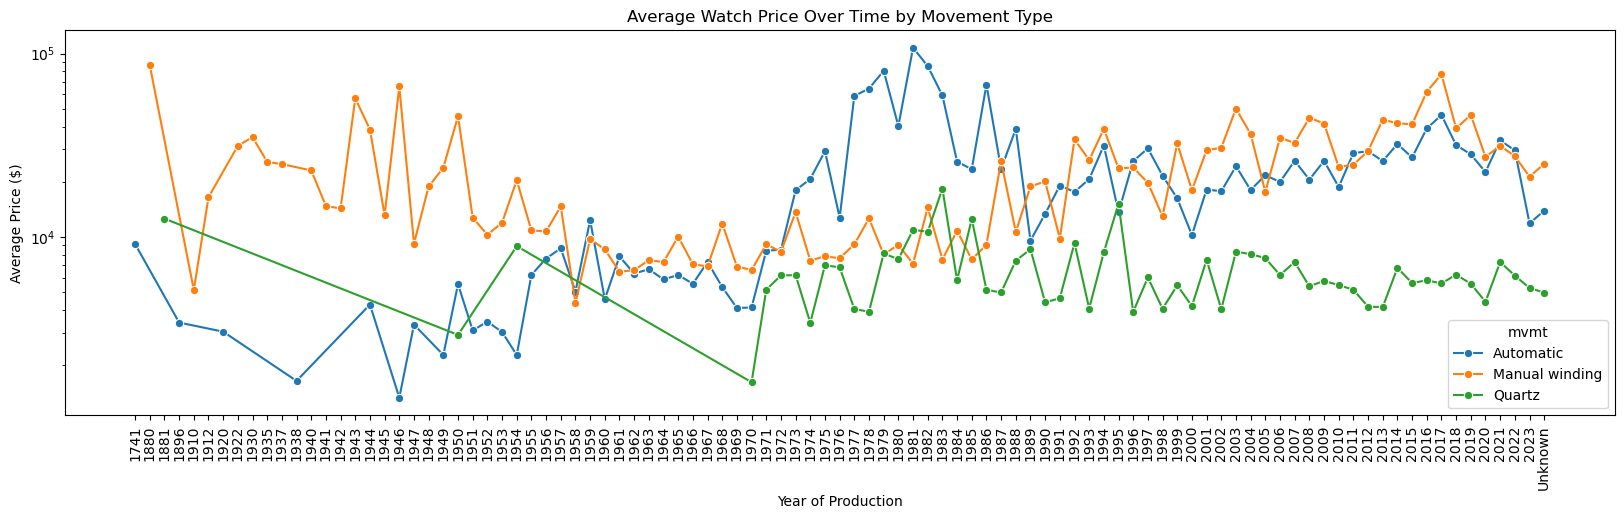

In [117]:
df_yearly_avg = df_watch.groupby(["yop", "mvmt"])["price"].mean().reset_index()
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_yearly_avg, x="yop", y="price", hue="mvmt", marker="o")
plt.title("Average Watch Price Over Time by Movement Type")
plt.xlabel("Year of Production")
plt.ylabel("Average Price ($)")
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

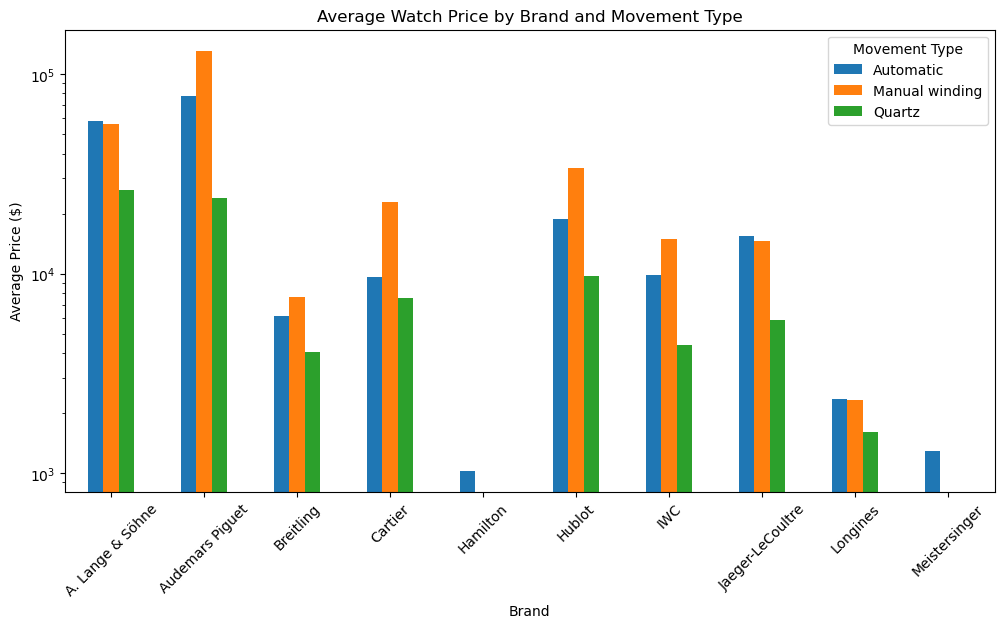

In [119]:
df_brand_avg = df_watch.groupby(["brand", "mvmt"])["price"].mean().unstack()
df_brand_avg = df_brand_avg.head(10)  # Select top 10 brands with data
df_brand_avg.plot(kind="bar", figsize=(12, 6), logy=True)
plt.title("Average Watch Price by Brand and Movement Type")
plt.xlabel("Brand")
plt.ylabel("Average Price ($)")
plt.legend(title="Movement Type")
plt.xticks(rotation=45)
plt.show()